## 10.2. Importing Required Libraries

In [2]:
import numpy as np  
import pandas as pd  
from sklearn.datasets.samples_generator import make_blobs  
from sklearn.cluster import KMeans  
from matplotlib import pyplot as plt  
import seaborn as sns
%matplotlib inline  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## 10.3. Importing the Dataset

In [3]:
## https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv
dataset = pd.read_csv('E:\Datasets\Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.shape

(200, 5)

## 10.4. Data Analysis

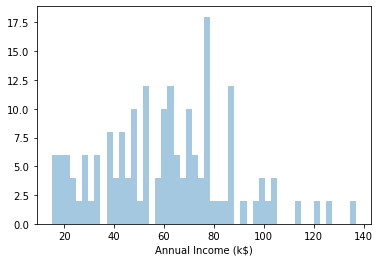

In [6]:
sns.distplot(dataset['Annual Income (k$)'], kde=False, bins = 50)


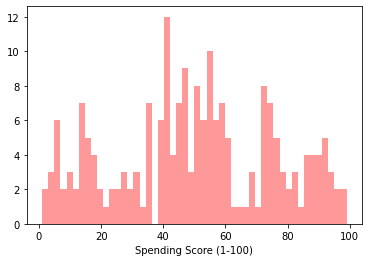

In [7]:
sns.distplot(dataset['Spending Score (1-100)'], kde=False, bins = 50, color = "red")

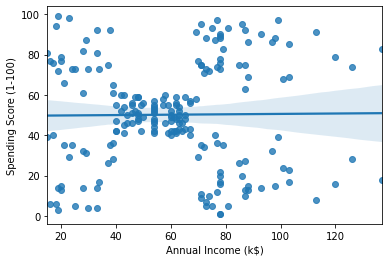

In [8]:
sns.regplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=dataset)

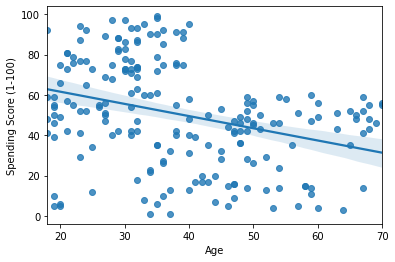

In [9]:
sns.regplot(x="Age", y="Spending Score (1-100)", data=dataset);

## 10.5. K-Means Clustering

In [10]:
dataset = dataset.filter(["Annual Income (k$)", "Spending Score (1-100)" ], axis = 1)
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
# performing kmeans clustering using KMeans class
km_model = KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [12]:
#printing centroid values
print(km_model.cluster_centers_)

[[48.26       56.48      ]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [26.30434783 20.91304348]]


In [13]:
#printing predicted label values
print(km_model.labels_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


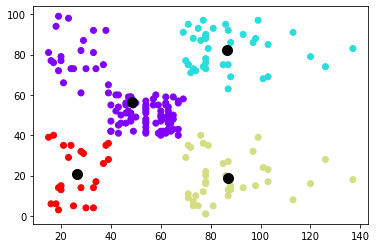

In [18]:
#pring the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c= km_model.labels_, cmap='rainbow' )


#print the centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')


## 10.6. Finding Optimal Value of K Via Elbow Method

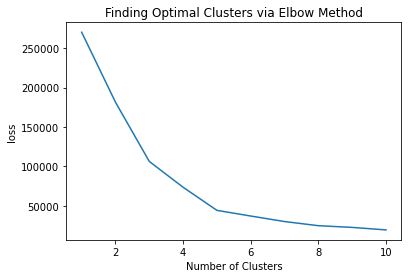

In [17]:
# training KMeans on K values from 1 to 10
loss =[]
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(dataset)
    loss.append(km.inertia_)

#printing loss against number of clusters

import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()

In [19]:
# performing kmeans clustering using KMeans class
km_model = KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

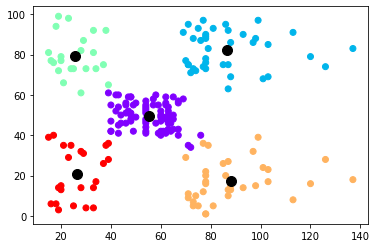

In [20]:
#pring the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c= km_model.labels_, cmap='rainbow' )


#print the centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')


## 10.7. Finding Customers to Target for Marketing

In [21]:
#printing centroid values
print(km_model.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [26]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = km_model.labels_

In [28]:
cluster_map

,data_index,cluster
0,0,4
1,1,2
2,2,4
3,3,2
4,4,4
...,...,...
195,195,1
196,196,3
197,197,1
198,198,3


In [29]:
cluster_map = cluster_map[cluster_map.cluster==1]
cluster_map.head()

,data_index,cluster
123,123,1
125,125,1
127,127,1
129,129,1
131,131,1


## Exercise 10.1


### Question 1

Which of the following is a supervised machine learning algorithm:

A- K Means Clustering \
B- Hierarchical Clustering \
C- All of the above \
D- None of the above

**Answer: D**
    
    
### Question 2

In KMeans clustering, the inertia tells us?

A- the distance between datapoints withina  cluster\
B- output labels for the datapoints \
C- the number of clusters \
D- None of the above

**Answer: C**


### Question 3

Which of the following are some of the disadvantages of K-Means clustering?

A- Manual selection of K value \
B- Convergence depends upon intial value of K \
C- Outliers affect clustering \
D- All of the above

**Answer: D**